In [13]:
# Imports

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

C:\Users\shihe\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
#code from https://github.com/kradolfer/quickdraw-image-recognition/blob/master/quickdraw_image_recognition.ipynb
#load 28x28 preprocessed numpy array
airplane = np.load('reducednp/airplane.npy')
alarmclock = np.load('reducednp/alarmclock.npy')
ambulance = np.load('reducednp/ambulance.npy')
angel = np.load('reducednp/angel.npy')
animalmigration = np.load('reducednp/animalmigration.npy')

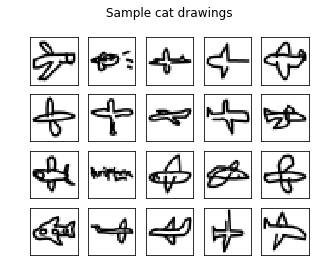

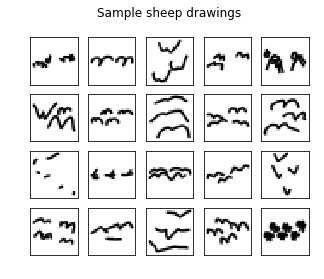

In [21]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
plot_samples(airplane, title='Sample cat drawings\n')
plot_samples(animalmigration, title='Sample sheep drawings\n')


In [22]:
# add a column with labels
airplane = np.c_[airplane, np.zeros(len(airplane))]
alarmclock = np.c_[alarmclock, np.ones(len(alarmclock))]
ambulance = np.c_[ambulance, 2*np.ones(len(ambulance))]
angel = np.c_[angel, 3*np.ones(len(angel))]
animalmigration = np.c_[animalmigration, 4*np.ones(len(animalmigration))]

# store the label codes in a dictionary
label_dict = {0:'airplane', 1:'alarmclock', 2:'ambulance', 3:'angel', 4:'animalmigration'}

print(airplane.shape)
print(alarmclock.shape)
print(ambulance.shape)
print(angel.shape)
print(animalmigration.shape)

(151623, 785)
(123399, 785)
(148004, 785)
(149736, 785)
(137847, 785)


In [23]:
X = np.concatenate((airplane[:5000,:-1], alarmclock[:5000,:-1], ambulance[:5000,:-1], angel[:5000,:-1], animalmigration[:5000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((airplane[:5000,-1], alarmclock[:5000,-1], ambulance[:5000,-1], angel[:5000,-1], animalmigration[:5000,-1]), axis=0).astype('float32') # the last column

X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [25]:
#gridsearchcv best parameters
rfc = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': np.arange(1,150,50), 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 101}

In [29]:
clf_rf = RandomForestClassifier(n_estimators=101, n_jobs=-1, random_state=0, max_depth = 8, max_features = 'auto', criterion = 'entropy')
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print ('random forest accuracy: ',acc_rf)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: ', cm)



random forest accuracy:  0.8148
confusion matrix:  [[1843   19  120  202  309]
 [  76 1981  178  222   74]
 [  74  128 2153   86   51]
 [ 282  119  201 1836   44]
 [ 227   92  131  135 1917]]


## Failed Attempts

In [2]:
reduced = pd.DataFrame()
files_directory = os.listdir("../Project/reduced")

for file in files_directory:
    print (file)
    reduced = reduced.append(pd.read_csv('../Project/reduced/' + file, index_col='key_id'))

airplane.csv
alarm clock.csv
ambulance.csv
angel.csv
animal migration.csv


In [3]:
from sklearn.utils import shuffle

# Shuffle data
reduced = shuffle(reduced, random_state=123)
reduced

,countrycode,drawing,recognized,timestamp,word
key_id,,,,,
5866934912417792,MX,"[[[103, 96, 89, 81, 63, 52, 32, 1, 15, 32, 54,...",True,2017-03-27 03:53:13.652430,angel
6258123239063552,US,"[[[113, 113, 118, 139, 133, 113], [36, 32, 28,...",True,2017-01-23 02:18:46.069770,ambulance
5008042552721408,US,"[[[143, 109, 100, 93, 88, 93, 99, 116, 128, 13...",True,2017-03-20 11:49:30.748410,angel
4728448318701568,US,"[[[53, 34, 16, 1, 0, 4, 16, 30, 100, 105], [79...",False,2017-03-08 00:04:53.933400,airplane
5951172798054400,US,"[[[75, 64, 22, 9, 2, 0, 7, 20, 85, 78, 77], [1...",True,2017-01-24 01:17:32.754540,airplane
5395615049580544,CA,"[[[200, 201], [13, 48]], [[205, 221, 239, 239,...",False,2017-03-08 23:42:45.940220,animal migration
5984032280018944,US,"[[[7, 23], [44, 76]], [[0, 10, 20, 22, 22, 34,...",True,2017-03-12 22:56:16.388690,ambulance
5876727190388736,PE,"[[[3, 11, 16, 28, 37, 50, 49, 59, 82, 72, 56, ...",True,2017-01-24 22:26:01.235510,ambulance
5303569437687808,US,"[[[54, 56], [34, 100]], [[31, 84], [68, 67]], ...",True,2017-03-02 14:42:50.454820,ambulance


In [9]:
import ast
from ast import literal_eval

X = reduced['drawing']
new_X = np.array([])
for i in X.index: 
    newx = ast.literal_eval(X[i])
    new_X = np.append(new_X,newx)
new_X

KeyboardInterrupt: 

In [ ]:
#convert string into nested lists matrix form
from ast import literal_eval

def convert_to_lists(s):
    return literal_eval(s)

reduced['drawing'] = reduced['drawing'].map(convert_to_lists)

In [ ]:
from sklearn.model_selection import train_test_split
y = reduced['word']
X = reduced['drawing'] #x data is in a matrix format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#find best parameters
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
# param_grid = { 
#     'n_estimators': np.arange(1,150,50), 
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [3,4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# CV_rfc.best_params_

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train

In [ ]:
#I see the error when X_train has n elements and all n elements are of not same size. 
#Workaround is to make sure all n elements in the X_train are of same size either by padding or trimming techniques.

In [ ]:
#fit model
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 101, max_depth=5, criterion='entropy')
rfc1.fit(X_train, y_train)